In [25]:
# Import libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt




In [19]:
# Load the Digits dataset
from sklearn.datasets import load_digits
digits = load_digits()



In [26]:
# Prepare the data
from sklearn.discriminant_analysis import StandardScaler


X = digits.data
Y = digits.target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=72)


# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the QDA model
model_qda = QuadraticDiscriminantAnalysis(reg_param=0.1)

# Fit the model
model_qda.fit(X_train, Y_train)



QuadraticDiscriminantAnalysis(reg_param=0.1)

In [6]:
# Predictions
from sklearn.metrics import roc_auc_score


pred_qda = model_qda.predict(X_test)
y_prob_qda = model_qda.predict_proba(X_test)

# Evaluations
bal_acc_qda = balanced_accuracy_score(Y_test, pred_qda)
roc_qda = roc_auc_score(Y_test, y_prob_qda, multi_class="ovr", average="macro")

print(f"QDA Balanced Accuracy: {bal_acc_qda:.4f}")
print(f"QDA ROC-AUC Score: {roc_qda:.4f}")


QDA Balanced Accuracy: 0.8191
QDA ROC-AUC Score: 0.9795


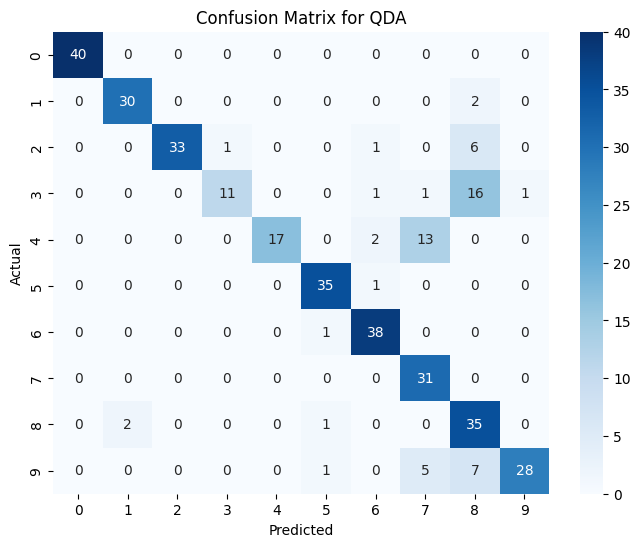

In [ ]:
# Confusion Matrix for QDA
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, pred_qda), annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for QDA")
plt.show()


In [40]:
# hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define the parameter grid for GridSearchCV
param_grid = [
    {"reg_param": [0.1]},  # Using a higher regularization value to reduce collinearity
    {"reg_param": [0.5, 1.0]}  # Trying higher levels of regularization
]

# GridSearchCV to tune QDA parameters with higher verbosity
grid_search_qda = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_qda.fit(X_train, Y_train)

# Best parameters found by GridSearchCV
print(f"\nBest QDA Parameters: {grid_search_qda.best_params_}")



Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best QDA Parameters: {'reg_param': 0.1}


In [ ]:
# best parameters
best_reg_param = grid_search_qda.best_params_["reg_param"]
best_tol = grid_search_qda.best_params_["tol"]

# Train optimized QDA model 
optimal_model_qda = QuadraticDiscriminantAnalysis(reg_param=best_reg_param, tol=best_tol)
optimal_model_qda.fit(X_train, Y_train)

# Predictions
optimal_pred_qda = optimal_model_qda.predict(X_test)
optimal_prob_qda = optimal_model_qda.predict_proba(X_test)

# Evaluate performance
bal_acc_optimized_qda = accuracy_score(Y_test, optimal_pred_qda)
roc_auc_optimized_qda = roc_auc_score(Y_test, optimal_prob_qda, multi_class="ovr")

print(f"Optimized QDA Balanced Accuracy: {bal_acc_optimized_qda:.4f}")
print(f"Optimized QDA ROC-AUC Score: {roc_auc_optimized_qda:.4f}")


Optimized QDA Balanced Accuracy: 0.9889
Optimized QDA ROC-AUC Score: 0.9947


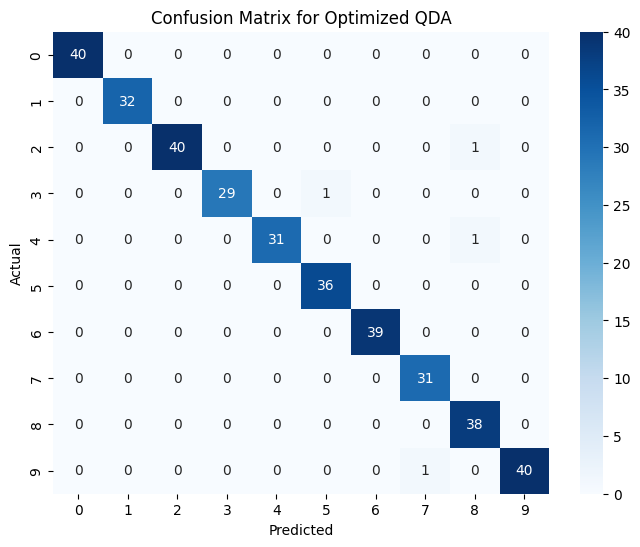

In [17]:
# Confusion Matrix for the optimized QDA model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, optimal_pred_qda), annot=True, fmt="d", cmap="Blues", xticklabels=data_set.target_names, yticklabels=data_set.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Optimized QDA")
plt.show()
